In [1]:
#Importing necessary libraries as well as the test and training sets
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import calendar
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')



In [2]:
#print of the train data set
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1/1/2011 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1/1/2011 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1/1/2011 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1/1/2011 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1/1/2011 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [3]:
#print of the test data set
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1/20/2011 0:00,1,0,1,1,10.66,11.365,56,26.0027
1,1/20/2011 1:00,1,0,1,1,10.66,13.635,56,0.0000
2,1/20/2011 2:00,1,0,1,1,10.66,13.635,56,0.0000
3,1/20/2011 3:00,1,0,1,1,10.66,12.880,56,11.0014
4,1/20/2011 4:00,1,0,1,1,10.66,12.880,56,11.0014
5,1/20/2011 5:00,1,0,1,1,9.84,11.365,60,15.0013
6,1/20/2011 6:00,1,0,1,1,9.02,10.605,60,15.0013
7,1/20/2011 7:00,1,0,1,1,9.02,10.605,55,15.0013
8,1/20/2011 8:00,1,0,1,1,9.02,10.605,55,19.0012
9,1/20/2011 9:00,1,0,1,2,9.84,11.365,52,15.0013


In [4]:
#impoting the plotter
%matplotlib inline

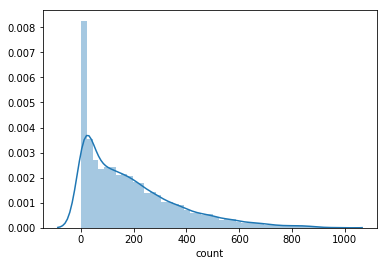

In [5]:
#distribution plot of the dependent variable, count
import seaborn as sns
g=sns.distplot(train['count'])

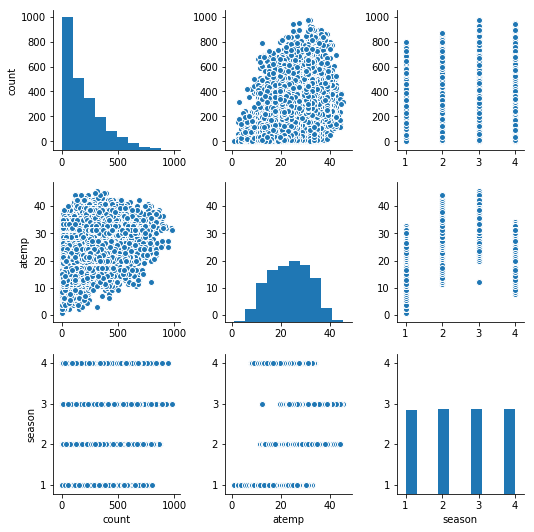

In [6]:
#pairplot visualization of count, atem"what the temperature feels like, and season
sns.pairplot(train[['count','atemp','season']])

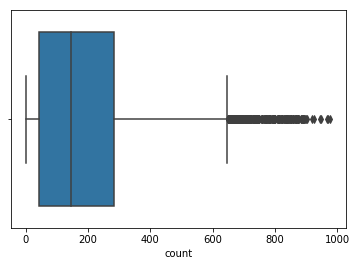

In [7]:
#boxplot visualization of the dependent variable count
sns.boxplot(train["count"])

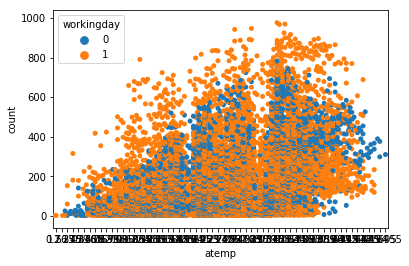

In [8]:
#scatterplot of the atemp and count with workingday variable
sns.swarmplot(x="atemp", y="count", hue="workingday", data=train)

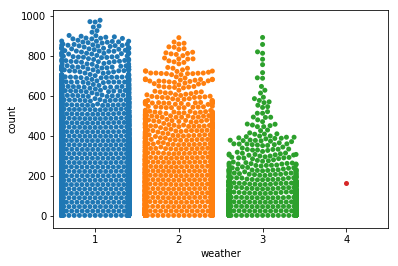

In [9]:
#plot of count vs season
sns.swarmplot(x="weather",y="count",data=train)

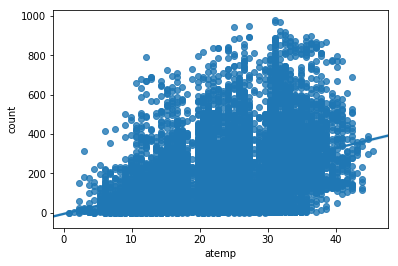

In [10]:
#plot with linear regression of atemp v count
sns.regplot(x="atemp",y="count",data=train)

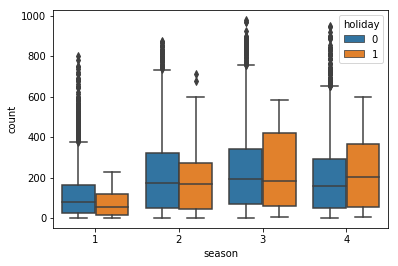

In [11]:
#boxplot visualization of season,count, and holiday
sns.boxplot(x="season",y="count",hue="holiday",data=train)

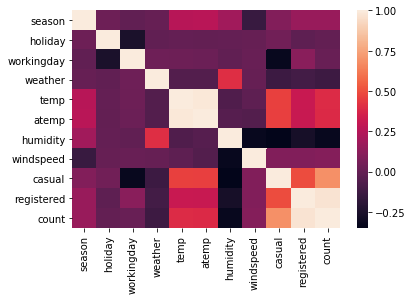

In [12]:
#correaltion plot of all of the variables
sns.heatmap(train.corr())

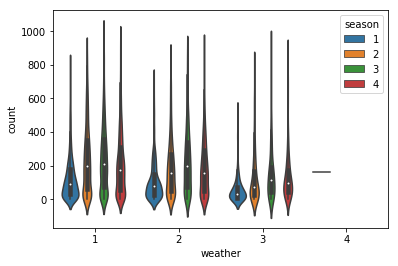

In [15]:
#violinplot visualization of the weather,count, and season
sns.violinplot(x="weather",y="count",hue="season", data=train)

In [16]:
#setting the y-variable for fitting in the models to the dependent variable count
y= train["count"]

In [17]:
#one-hot encoding weather and season variables
train_xsimple = pd.get_dummies(train[['weather','season']])
train_xsimple.head()

,weather,season
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [18]:
#importing datetime library
from datetime import datetime


In [19]:
#feature creation of  hour,year, weekday, month, and day variables from datetime
train["hour"] = train["datetime"].apply(lambda x : x.split()[1].split(":")[0]).astype("int")
train["year"] = train["datetime"].apply(lambda x : x.split()[0].split("/")[0])
train["weekday"] = train["date"].apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").weekday())
train["month"] = train["date"].apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").month)
train["day"] = train["date"].apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").day)


In [20]:
#putting all variables in dataframe X
X= pd.concat([train[['day','hour','year','weekday','month','holiday','workingday','atemp','temp','humidity','windspeed','count']],train_xsimple], axis=1)
X.head()

,day,hour,year,weekday,month,holiday,workingday,atemp,temp,humidity,windspeed,count,weather,season
0,1,0,1,5,1,0,0,14.395,9.84,81,0.0,16,1,1
1,1,1,1,5,1,0,0,13.635,9.02,80,0.0,40,1,1
2,1,2,1,5,1,0,0,13.635,9.02,80,0.0,32,1,1
3,1,3,1,5,1,0,0,14.395,9.84,75,0.0,13,1,1
4,1,4,1,5,1,0,0,14.395,9.84,75,0.0,1,1,1


In [21]:
#calculating the average number of bikes for the training dataset
avg=train['count'].mean()
avg

191.57413191254824

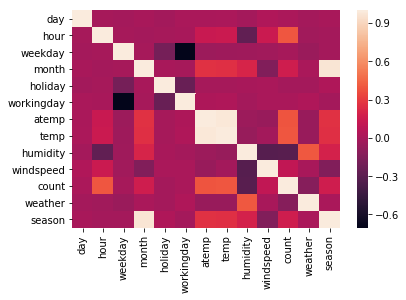

In [22]:
#heatmap of X
sns.heatmap(X.corr())

In [23]:
#adding a prediction variable for the average in the training dataset
train['pred']= avg
train


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month,day,pred
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1/1/2011,0,1,5,1,1,191.574132
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1/1/2011,1,1,5,1,1,191.574132
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1/1/2011,2,1,5,1,1,191.574132
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1/1/2011,3,1,5,1,1,191.574132
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1/1/2011,4,1,5,1,1,191.574132
5,1/1/2011 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1/1/2011,5,1,5,1,1,191.574132
6,1/1/2011 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1/1/2011,6,1,5,1,1,191.574132
7,1/1/2011 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,1/1/2011,7,1,5,1,1,191.574132
8,1/1/2011 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1/1/2011,8,1,5,1,1,191.574132
9,1/1/2011 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1/1/2011,9,1,5,1,1,191.574132


In [24]:
#defining the prediction as the average value
y_pred=train['pred']

In [25]:
#creating the root-mean log squared error function for calculating accuracy
import numpy as np
def rmsle(y_true,y_pred):
    assert len(y_true) == len(y_pred)
    return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5


In [26]:
#calculating results of null,average, model
print ("RMSLE Value For Average: ",rmsle(y,y_pred))

RMSLE Value For Average:  1.5691983019476001


In [27]:
#splitting the test and train dataset
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=100)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
2923     363
2905     140
8474     439
174      102
479        5
3232     167
10388     15
9609     887
2313      87
8863     531
4257     365
8767     445
6423      79
7367     114
10212    193
4844     113
9076     504
6935      54
2511     373
6305      74
5616       3
4111     372
9400     109
4307     181
5240     105
5093     234
91        11
5737       4
966      228
6879     131
        ... 
4231     103
2883      53
10843     36
9220     354
5843     176
6901     234
3213     321
4993       1
10655    284
1900      16
5787      33
2434     432
6230     211
5769     224
9723     260
7738     554
1340     281
10091    241
9871     447
4376     180
802       92
5646      83
7906     360
4149     114
10082    150
350       16
79        57
8039     653
6936     123
5640       4
Name: count, Length: 5443, dtype: int64
7810     513
1366     148
2494     275
3555      24
771       82
8511      43
5865     119
7819      10
8176      17
9569       9


In [29]:
#importing linear regression model,fitting to dataset, and creating prediction
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
lModel = LinearRegression()
lModel.fit(test_X, train_y)
pred1_y = lModel.predict(test_X)


In [30]:
#checking size of test set
test_y.shape

(5443,)

In [31]:
#displaying model predictions
print(pred1_y)

[ 201.43310032  203.95061825  199.21704136 ...,  209.62935417  166.90036306
  202.07851909]


In [34]:
#printing results of linear regression
print ("RMSLE Value For Regression: ",rmsle(pred1_y,train_y))

RMSLE Value For Regression:  1.569836815293765


In [35]:
#minimizing x to temp and atemp for different modeling parameters
X= pd.concat([train[['atemp','temp']]], axis=1)
X.head()

,atemp,temp
0,14.395,9.84
1,13.635,9.02
2,13.635,9.02
3,14.395,9.84
4,14.395,9.84


In [36]:
#setting X back for different modleing features
X= pd.concat([train[['day','hour','year','weekday','month','holiday','workingday','atemp','temp','humidity','windspeed']],train_xsimple], axis=1)
X.head()

,day,hour,year,weekday,month,holiday,workingday,atemp,temp,humidity,windspeed,weather,season
0,1,0,1,5,1,0,0,14.395,9.84,81,0.0,1,1
1,1,1,1,5,1,0,0,13.635,9.02,80,0.0,1,1
2,1,2,1,5,1,0,0,13.635,9.02,80,0.0,1,1
3,1,3,1,5,1,0,0,14.395,9.84,75,0.0,1,1
4,1,4,1,5,1,0,0,14.395,9.84,75,0.0,1,1


In [37]:
#refining X again for less complex model
X= pd.concat([train[['day','hour','month','weekday','temp']],train_xsimple], axis=1)
X.head()

,day,hour,month,weekday,temp,weather,season
0,1,0,1,5,9.84,1,1
1,1,1,1,5,9.02,1,1
2,1,2,1,5,9.02,1,1
3,1,3,1,5,9.84,1,1
4,1,4,1,5,9.84,1,1


In [38]:
#splitting the data
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=100)

In [39]:
#importing random forest model and fitting
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
rfModel.fit(train_X, train_y)
pred2_y = rfModel.predict(train_X)

In [41]:

#printing results of  random forest model
print ("RMSLE Value For Random Forest: ",rmsle(pred2_y,train_y))

RMSLE Value For Random Forest:  0.205130042481077


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtmodel= DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
dtmodel.fit(train_X,train_y)
preddt_y=dtmodel.predict(train_X)

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(preddt_y, out_file=dot_data,  
                filled=True, rounded=True)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

TypeError: [363 140 439 ..., 653 123   4] is not an estimator instance.

In [37]:
train_X['pred_dt']=preddt_y
train_X["test"]=train_y
print(train_X)

       day  hour year  weekday  month  holiday  workingday   atemp   temp  \
2923    10    17    7        6      7        0           0  37.120  34.44   
2905     9    23    7        5      7        0           0  33.335  29.52   
8474    14    11    7        5      7        0           0  34.090  29.52   
174      8    13    1        5      1        0           0   9.090   8.20   
479      3     1    2        3      2        0           1   7.575   8.20   
3232     4    14    8        3      8        0           1  37.880  32.80   
10388   18     6   11        6     11        0           0  13.635  11.48   
9609     4    18   10        3     10        0           1  31.060  27.06   
2313     4     7    6        5      6        0           0  26.515  22.96   
8863    11    16    8        5      8        0           0  36.365  32.80   
4257     9    10   10        6     10        0           0  26.515  22.96   
8767     7    16    8        1      8        0           1  36.365  31.16   

In [39]:
print ("RMSLE Value For Decision Tree: ",rmsle(preddt_y,test_y))

RMSLE Value For Decision Tree:  1.9976058475582865
